用了三种方法做聚类分析
* Kmeans
* dbscan
* Kmeans++

但是2014年数据量偏少，所以做出的结果基本是按照雨量进行聚类的。

# 读数据，并且将0值去除了。

In [1]:
library(readxl)

Rain <- read.csv("~/Documents/GitHub/R/Water_Beijing/降雨数据C/all.csv")
colnames(Rain)[4:5] <- c("Amount","Duration")
rain <- Rain[,c(4:5)]
row_sub = apply(rain, 1, function(row) all(row !=0 ))
rain <- rain[row_sub,]

# 可以看得出，有很大的离散值。

In [2]:
summary(rain)

     Amount          Duration      
 Min.   : 0.010   Min.   :   1.00  
 1st Qu.: 0.240   1st Qu.:   9.00  
 Median : 0.400   Median :  18.00  
 Mean   : 3.467   Mean   :  86.06  
 3rd Qu.: 0.900   3rd Qu.:  33.00  
 Max.   :40.900   Max.   :1032.00  

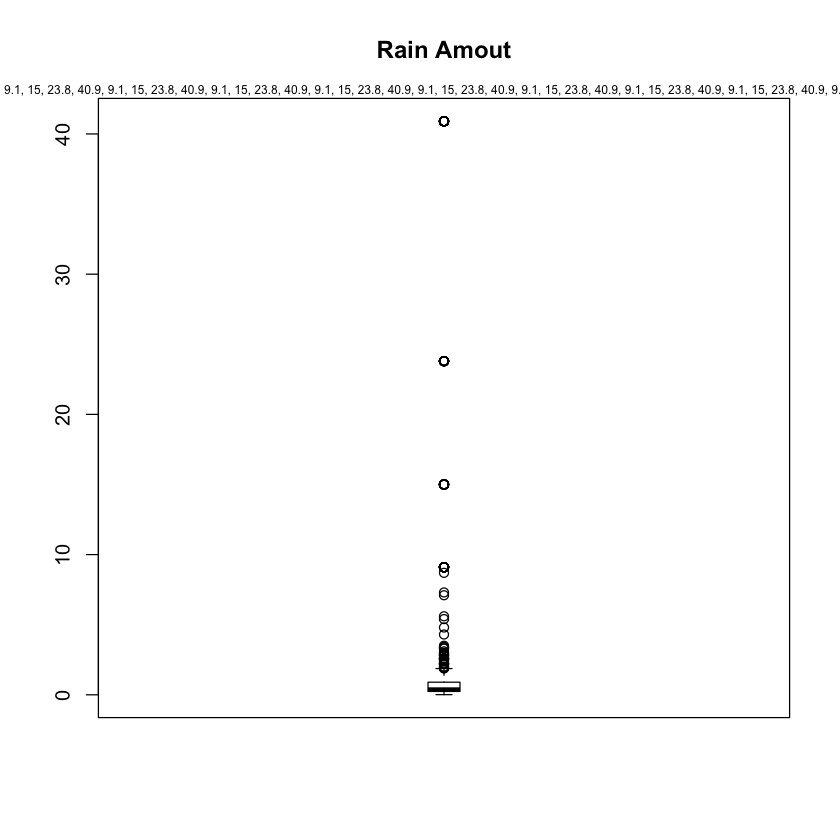

In [3]:
outlier_values <- boxplot.stats(rain$Amount)$out  # outlier values.
boxplot(rain$Amount, main="Rain Amout", boxwex=0.1)
mtext(paste("Outliers: ", paste(outlier_values, collapse=", ")), cex=0.6)

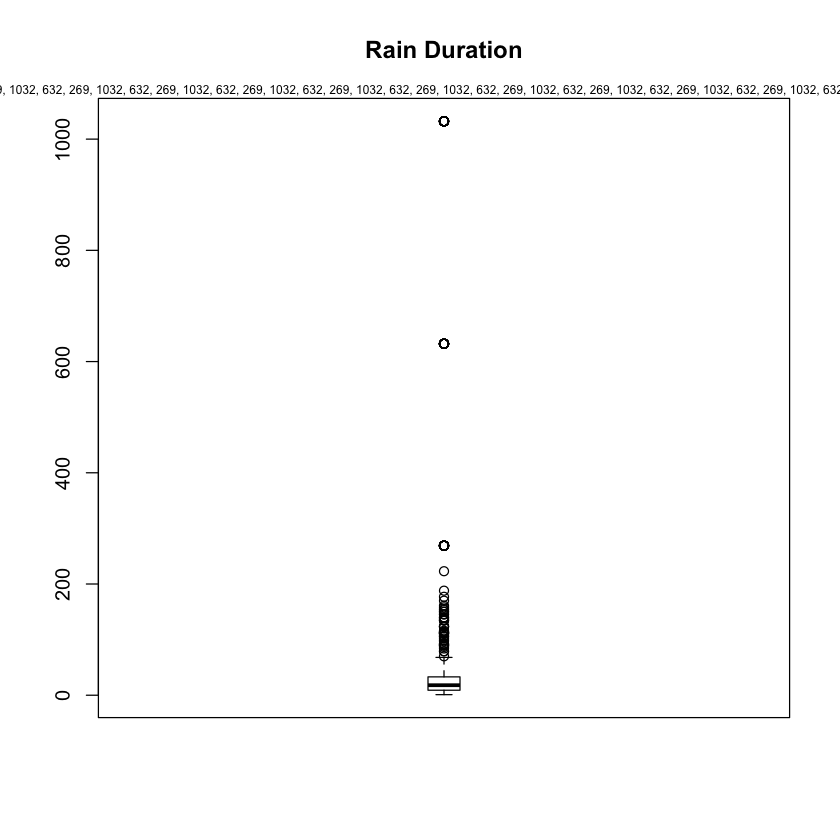

In [4]:
outlier_values <- boxplot.stats(rain$Duration)$out  # outlier values.
boxplot(rain$Duration, main="Rain Duration", boxwex=0.1)
mtext(paste("Outliers: ", paste(outlier_values, collapse=", ")), cex=0.6)

## 去除三个离散值

In [5]:
rain <- rain[-which(rain$Amount==max(rain$Amount)),]
rain <- rain[-which(rain$Amount==max(rain$Amount)),]
rain <- rain[-which(rain$Amount==max(rain$Amount)),]

# K-means

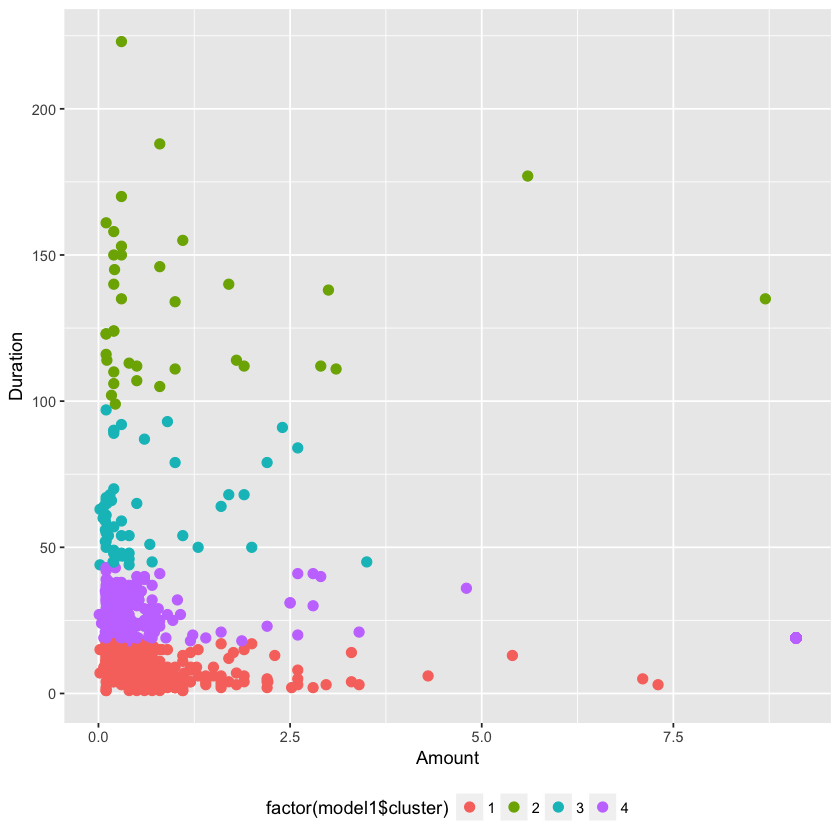

In [6]:
library('fpc')
library("ggplot2")
model1 <- kmeans(rain,centers=4,nstart=10)
p <- ggplot(rain,aes(Amount,Duration))
p + geom_point(size=2.5,aes(colour=factor(model1$cluster)))+ 
        theme(legend.position = "bottom")

# DBSCAN

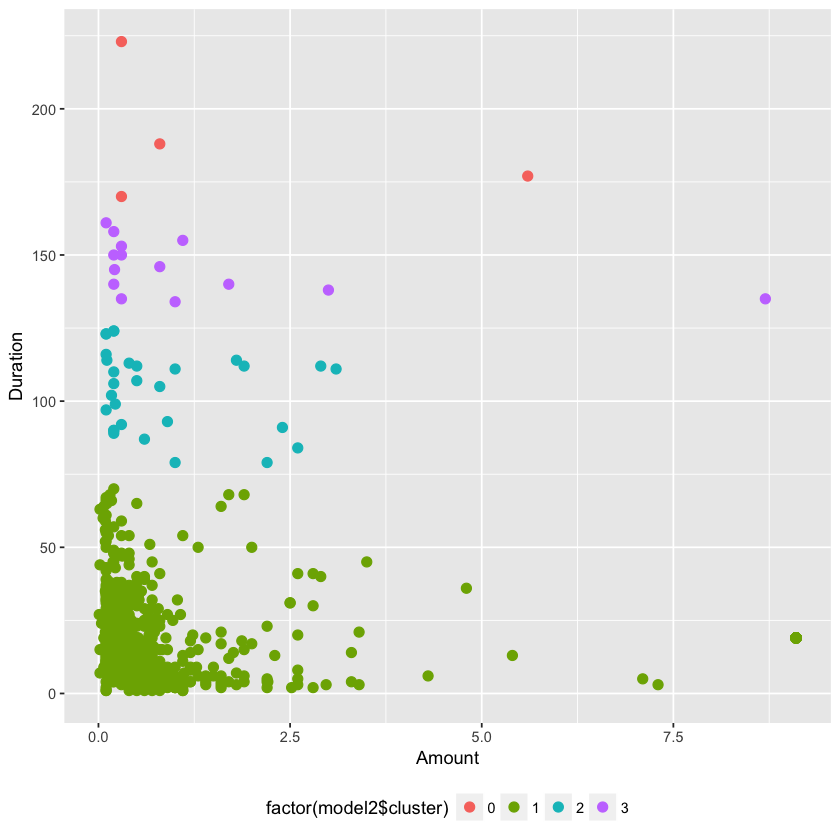

In [7]:
model2 <- dbscan(rain,eps=8,MinPts=4)
p + geom_point(size=2.5, aes(colour=factor(model2$cluster)))+
        theme(legend.position = "bottom")

# Kmeans++

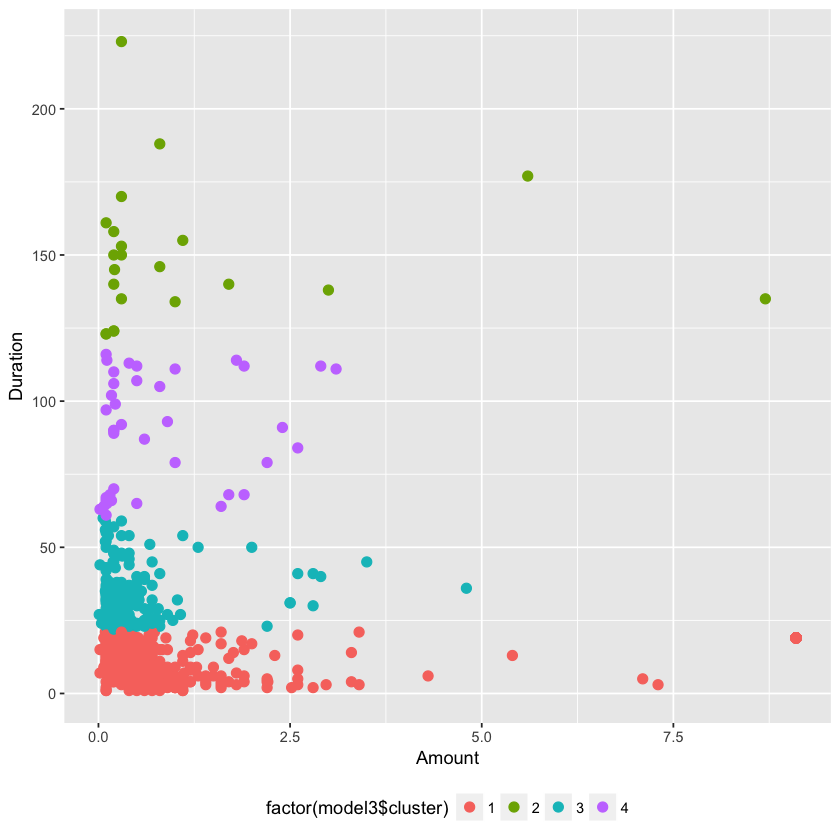

In [8]:
library(LICORS)
model3 <- kmeanspp(rain, k = 4, start = "random", iter.max = 100, nstart = 1)
p + geom_point(size=2.5, aes(colour=factor(model3$cluster)))+
        theme(legend.position = "bottom")

In [9]:
result <- cbind(rain,model1$cluster,model2$cluster,model3$cluster)

In [10]:
Rain1 <- merge(Rain,result,by=c("Amount","Duration"))

In [11]:
head(Rain1)

Amount,Duration,ID,Year,DateTime,雨强.mm.h.,model1$cluster,model2$cluster,model3$cluster
0.01,27,197,2016,2016/8/8 12:51,0.02,4,1,3
0.02,15,134,2016,2016/7/7 4:51,0.08,1,1,1
0.02,44,139,2016,2016/7/7 7:10,0.03,3,1,3
0.02,63,141,2016,2016/7/7 8:38,0.02,3,1,4
0.02,7,18,2016,2016/5/5 8:59,0.17,1,1,1
0.04,24,15,2016,2016/5/5 8:14,0.10,4,1,3


In [12]:
write.csv(Rain1,"Rain_afterClustering.csv")